# 1
A particle is represented by the wave function
$
\begin{equation*}
\psi (x)=\begin{cases}
\frac{Ax}{a} & 0\leq x\leq a\\
\frac{A( b-x)}{b-a} & a\leq x\leq b\\
0 & \text{otherwise}
\end{cases}
\end{equation*}
$
where $A, a \text{ and } b$ are constants.


A. Normalize $\psi$ by finding A as a function of $a$ and $b$. (434: 3 pts, 591: 2 pts)
B. Sketch $\psi(x)$ as a function of $x$. (434: 3 pts, 591: 2 pts)
C. Sketch $\left|\psi(x)\right|^2$ as a function of x. (434: 3 pts, 591: 2 pts)
D. Where is the particle most likely to be found? (434: 3 pts, 591: 2 pts)
E. What is the probability of finding the particle to the left of $a$? (434: 3 pts, 591: 2 pts)
F. Calculate the expectation values of $x$ and $x_2$ (434: 12 pts, 591: 8 pts)

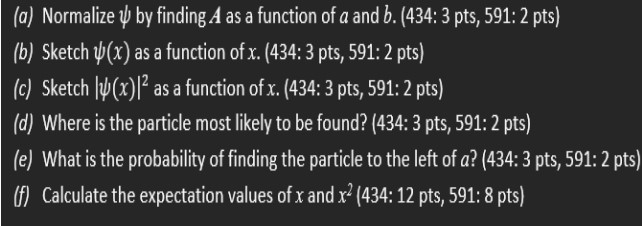

A. Normalize $\psi$ by finding A as a function of $a$ and $b$. (434: 3 pts, 591: 2 pts)


In [190]:
from sympy import symbols, integrate, solve, latex
from IPython.display import display, Math

A, a, b, x = symbols('A a b x', positive = True)

psi1 = A*x/a
psi2 = A*(b-x)/(b-a)

total_probability = integrate(psi1 ** 2, (x, 0, a)) + integrate(psi2 ** 2, (x, a, b))

A = solve(total_probability - 1, A)[0]

display(Math(f'A = {latex(A)} = \sqrt{{ \\frac{{3}}{{b}} }}'))


<IPython.core.display.Math object>

B. Sketch $\psi(x)$ as a function of $x$. (434: 3 pts, 591: 2 pts)


In [129]:
import numpy as np
import plotly.express as px
from pandas import DataFrame

#take advantage of function scoping so as have A, x, a, and b have different values in this chunk than the #others without having to reassign them later
def Psi(x, a, b):
  A = (3/b)**0.5
  if (0 <= x) & (x < a):
    psi = A*x/a
  elif (a <= x) & (x <= b):
    psi = A*(b-x)/(b-a)
  else:
    psi = 0
  return psi


def plot_psi(a, b):
    x = np.linspace(-1, b+2, num = 10000)
    psi_array = []
    for i in x:
      psi_array.append(Psi(i, a, b))

    psi_df = DataFrame({'x': x, 'psi': psi_array})
    px.line(psi_df, x = 'x', y = 'psi').show()
    return(psi_df)

psi_df = plot_psi(a = 0.5, b = 3)


C. Sketch $\left|\psi(x)\right|^2$ as a function of x. (434: 3 pts, 591: 2 pts)


In [179]:
psi_squared_df = psi_df.rename(columns = {'psi':'psi^2'})
psi_squared_df['psi^2'] *= psi_squared_df['psi^2']

px.line(psi_squared_df, x = 'x', y = 'psi^2')

In [180]:
#double check that integral of PDF is 1
round(np.trapz(psi_squared_df['psi^2'], psi_squared_df['x']), 5)

1.0

D. Where is the particle most likely to be found? (434: 3 pts, 591: 2 pts)

As can be seen from the plots from parts B and C, the peak of both $\psi$ and $\psi^2$ is at $x = a$.

E. What is the probability of finding the particle to the left of $a$? (434: 3 pts, 591: 2 pts)

This is simply the integral of $\psi^2$ from $0$ to $a$:

In [185]:
#update definition of psi1 to include modified defintion of  A
psi1 = A*x/a
psi2 = A*(b-x)/(b-a)

display(Math(f'P(x < a) = {latex(integrate(psi1 ** 2, (x, 0, a)))}'))


<IPython.core.display.Math object>

F. Calculate the expectation values of $x$ and $x^2$ (434: 12 pts, 591: 8 pts)


In [186]:
from sympy import simplify, collect, ratsimp

#since psi is only piecewise differentiable, it must be integrated over its two intervals separately
E_X = simplify(integrate(x*psi1 ** 2, (x, 0, a)) + integrate(x*psi2 ** 2, (x, a, b)))
E_X2 = simplify(integrate(x**2 * psi1**2, (x, 0, a)) + integrate(x**2 * psi2**2, (x, a, b)))

display(Math(f'E(x) = {latex(E_X.together())}'))
display(Math(f'E(x^2) = {latex(E_X2.together())}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 2
$P_{ab}(t)$ describes the probability of finding a particle between $a<x<b$, at time $t$.

A. Using the Schrödinger equation, shown that the time derivative of the probability can be expressed using the difference in probability current:
<p style="text-align: center;">$\frac{dP_{ab}}{dt}=J(a,t)-J(b,t)$,</p>

<p style="text-align: center;">which itself is given by </p>

<p style="text-align: center;">$J(x,t)= \frac{iℏ}{2m}\left(\psi\frac{\partial \psi^*}{\partial x}-\psi^*\frac{\partial \psi}{\partial x}\right)$.</p>

<p style="text-align: center;">(434: 6 pts, 591: 3 pts)</p>

$P_{ab}=\int_a^b |\psi(x,t)|^2dx = \int_a^b \psi(x,t) \cdot \psi^*(x,t) dx \implies \frac{dP_{ab}}{dt} =
\frac{d}{dt}\int_a^b \psi(x,t) \cdot \psi^*(x,t) dx
$&emsp;&emsp;&emsp;&emsp;(1)

Per the Leibniz integral rule, that can be rewritten as:

$\frac{dP_{ab}}{dt}=\int_a^b \frac{\partial}{\partial t}\left(\psi(x,t) \cdot \psi^*(x,t)\right) dx = \int_a^b \left(\psi\frac{\partial \psi^*}{\partial t}+\psi^*\frac{\partial \psi}{\partial t}\right) dx
$&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(2)



From the Schrodinger equation:
$i\hbar\frac{\partial \psi}{\partial t} = \frac{-\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2} + U(x)\psi \implies
\frac{\partial \psi}{\partial t} = \frac{i\hbar}{2m}\frac{\partial^2 \psi}{\partial x^2} -\frac{i}{\hbar}U(x)\psi \implies
\frac{\partial \psi^*}{\partial t} = -\frac{i\hbar}{2m}\frac{\partial^2 \psi}{\partial x^2} +\frac{i}{\hbar}U(x)\psi
$&emsp;&emsp;&emsp;&emsp;(3)


Plugging (3) into (2):
$
\frac{dP_{ab}}{dt} =\int _{a}^{b}\left( \psi \left( -\frac{i\hbar }{2m}\frac{\partial ^{2} \psi }{\partial x^{2}} +\frac{i}{\hbar } U(x)\psi \right) +\psi ^{*}\left(\frac{i\hbar }{2m}\frac{\partial ^{2} \psi }{\partial x^{2}} -\frac{i}{\hbar } U(x)\psi \right)\right) dx=

\begin{equation*}
\int _{a}^{b}\left( \psi \frac{-i\hbar }{2m}\frac{\partial ^{2} \psi }{\partial x^{2}} +\psi ^{*}\frac{-i\hbar}{2m}\frac{\partial ^{2} \psi }{\partial x^{2}}\right) dx=
\end{equation*}\\



\begin{equation*}
\frac{i\hbar}{2m}\int _{a}^{b}\left( \psi \frac{\partial ^{2} \psi ^{*}}{\partial x^{2}} -\psi ^{*}\frac{\partial ^{2} \psi }{\partial x^{2}}\right) dx=
\end{equation*}


\frac{i\hbar}{2m}\int _{a}^{b}\left( \psi \frac{\partial ^{2} \psi ^{*}}{\partial x^{2}} -\psi ^{*}\frac{\partial ^{2} \psi }{\partial x^{2}}\right) dx
$

Applying integration by parts to each half of the integral above gives:
$

\int \psi \frac{\partial ^{2} \psi ^{*}}{\partial x^{2}} dx\ =\ \psi \frac{\partial \psi ^{*}}{\partial x} -\int \frac{\partial \psi ^{*}}{\partial x}\frac{\partial \psi }{\partial x} dx\\
\\
\int \psi ^{*}\frac{\partial ^{2} \psi }{\partial x^{2}} dx=\psi ^{*}\frac{\partial \psi }{\partial x} -\int\frac{\partial \psi ^{*}}{\partial x}\frac{\partial \psi }{\partial x} dx

$


And so,

$
\begin{equation}
\frac{dP_{ab}}{dt} =
\frac{i\hbar}{2m}\int_{a}^{b}\left( \psi \frac{\partial^{2} \psi^{*}}{\partial x^{2}} -
\psi^{*}\frac{\partial^{2} \psi }{\partial x^{2}}\right) dx=

\Bigl|_{a}^{b}\frac{i\hbar}{2m}\left( \psi \frac{\partial \psi^{*}}{\partial x} -
\int \frac{\partial \psi^{*}}{\partial x}\frac{\partial \psi }{\partial x} dx -
\left( \psi^{*}\frac{\partial \psi }{\partial x} -
\int \frac{\partial \psi^{*}}{\partial x}\frac{\partial \psi }{\partial x} dx\right)\right) = \\
\end{equation}
\\
\begin{equation}
\Bigl|_{a}^{b}\frac{i\hbar }{2m}\left( \psi \frac{\partial \psi^{*}}{\partial x} -
\psi^{*}\frac{\partial \psi }{\partial x}\right) = J(a,t) - J(b,t)
\end{equation}
$

B. Find the probability current for the wave function below (both: 5 pts bonus)

<p style="text-align: center;">$\psi(x,t)=Ae^{-\lambda|x|}e^{-i\omega t}$</p>

In [187]:
from sympy import exp, conjugate, simplify, I

def Prob_current():

  A, x, t, Lambda, omega, m, hbar = symbols('A x t lambda omega m hbar', real = True, positive = True)

  psi = A*exp(-Lambda*abs(x) - I*omega*t)

  Prob_current = (I*hbar/(2*m))*(psi*(psi.conjugate().diff(x)) - (psi.conjugate())*(psi.diff(x)))

  print("Probability current = ", Prob_current)

Prob_current()

Probability current =  0


# 3
A particle of mass m is in the state $\psi(x,t)=A\exp\left(-a\left(\frac{mx^{2}}{ℏ}+it\right)\right)$, where $A$ and $a$ are positive real constants.

A. Find $A$. (434: 4 pts, 591: 2 pts) }

From Wolfram Alpha:

$\int_{-\infty}^{\infty} |\psi|^2 dx = A^2 \sqrt{\frac{\pi\hbar}{2am}}$


Setting that to $1$ gives
$A = \left(\frac{2am}{\pi\hbar}\right)^{\frac{1}{4}}$

B. For what potential energy function $V(x)$ does $\psi(x,t)$ satisfy the Schrödinger equation?
(434: 3 pts, 591: 2 pts)

From the schrodinger equation:
$i\hbar\frac{\partial \psi}{\partial t} = \frac{-\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2} + U(x)\psi$

$U(x) = i\hbar\frac{\partial\psi}{\partial t} + \frac{\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2}$

Since, $\psi(x,t)=A\exp\left(-a\left(\frac{mx^{2}}{ℏ}+it\right)\right)$, which is an exponential function of $t$ and $x^2$,

$\frac{\partial \psi}{\partial t} = -ai\psi \\

\frac{\partial^2\psi}{\partial x^2} = (-2a\frac{m}{\hbar}x)^2 \psi = 4a\frac{m^2}{\hbar^2}x^2 \psi$

Hence,
$
U(x) = -ai\hbar i\psi + 4a\frac{m^2}{\hbar^2}x^2 \frac{\hbar^2}{2m} \psi  = -a\psi\cdot(i\hbar + 2mx^2) =
-a(i\hbar + 2mx^2)\cdot A\exp\left(-a\left(\frac{mx^{2}}{ℏ}+it\right)\right) = \\
-\left(\frac{2am}{\pi\hbar}\right)^{\frac{1}{4}} a(i\hbar + 2mx^2)\cdot \exp\left(-a\left(\frac{mx^{2}}{ℏ}+it\right)\right)
$